#q3

Kuwahara filter:

In image processing, the Kuwahara filter is an edge-preserving smoothing filter. Because of its ability to lessen noise while maintaining image edges, it is very helpful for applications like image enhancement and segmentation.

Important attributes:
Non-linear Filter: The Kuwahara filter is non-linear in contrast to linear filters (such as Gaussian). In order to function, it examines the nearby pixels in the area and chooses values according to their statistical characteristics.

Local Analysis: The filter separates each pixel into overlapping sub-regions by taking into account the local neighborhood surrounding it, which is often shaped like a square.

Statistical Computation: The filter determines the mean and variance of pixel intensities for each sub-region. By selecting the area with the least variance, the Kuwahara filter smoothes down noise and preserves

Output: The mean intensity of the chosen sub-region is the output for each pixel, enabling the filter to preserve clean edge transitions.


 edges.




In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
# Loading the image
img = Image.open('dip.jpg').convert('L')
img_array = np.array(img)


In [3]:
def kuwahara_filter(image, window_size=5):
    """Apply Kuwahara filter to an image."""
    padded_image = np.pad(image, pad_width=window_size//2, mode='reflect')
    output = np.zeros(image.shape)
    
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Defining the 4 sub-regions based on the window size
            region = padded_image[y:y + window_size, x:x + window_size]
            region1 = region[:window_size//2, :window_size//2]
            region2 = region[:window_size//2, window_size//2:]
            region3 = region[window_size//2:, :window_size//2]
            region4 = region[window_size//2:, window_size//2:]

            # Calculating the mean and variance for each region
            mean1, var1 = np.mean(region1), np.var(region1)
            mean2, var2 = np.mean(region2), np.var(region2)
            mean3, var3 = np.mean(region3), np.var(region3)
            mean4, var4 = np.mean(region4), np.var(region4)

            # Selecting the region with the smallest variance
            variances = [var1, var2, var3, var4]
            min_index = np.argmin(variances)

            # Setting the output pixel value to the mean of the selected part
            if min_index == 0:
                output[y, x] = mean1
            elif min_index == 1:
                output[y, x] = mean2
            elif min_index == 2:
                output[y, x] = mean3
            else:
                output[y, x] = mean4

    return output.astype(np.uint8)

# Applying the Kuwahara filter
filtered_image = kuwahara_filter(img_array, window_size=5)


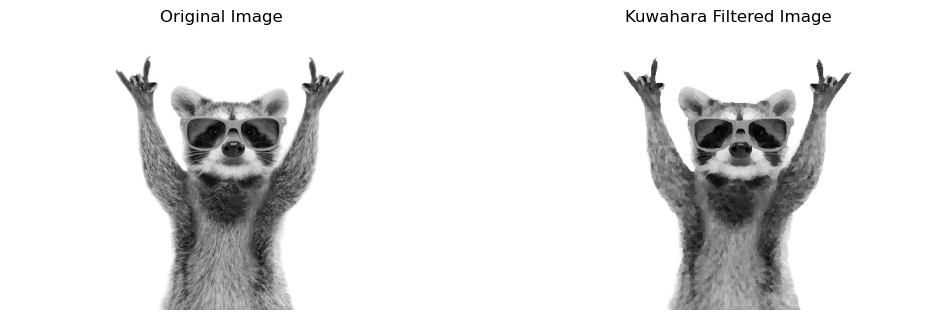

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Kuwahara Filtered Image')
plt.axis('off')

plt.show()
